In [170]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### What title makes video popular?

In [171]:
videos = pd.read_csv('USvideos.csv')
videos.head()
print('How much data do we have: {count}'.format(count=len(videos.index)))

How much data do we have: 40949


### What makes videos popular?

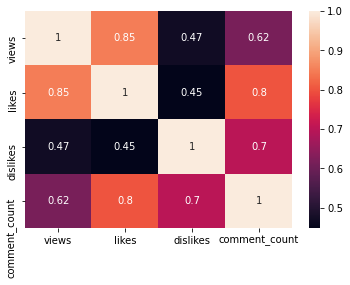

In [172]:
class CorrelationMatrix:
    def __init__(self, df):
        self.df = df
    def draw(self):
        corr_matrix = self.df[['views', 'likes', 'dislikes', 'comment_count']].corr()
        sn.heatmap(corr_matrix, annot=True)
        plt.show()
CorrelationMatrix(videos).draw()

How much data still left: 6455


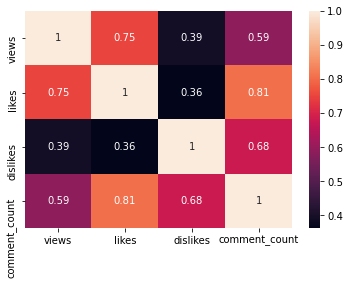

In [173]:
class YoutubeNormalizer:

    def __init__(self, csv):
        self.csv = csv

    def get_normalized_data(self):
        self.csv.drop_duplicates(subset ="title", keep = 'first', inplace = True)
        title_with_views = self.csv[['title', 'views', 'likes', 'dislikes', 'comment_count']]
        sorted_df = title_with_views.sort_values(by=['views'], ascending=False)
        return sorted_df

normalized_data = YoutubeNormalizer(videos).get_normalized_data()
print('How much data still left: {count}'.format(count=len(normalized_data.index)))
normalized_data.head(10)
CorrelationMatrix(normalized_data).draw()